In [ ]:
# Importing the librariies and function initialization #

from facenet_pytorch import MTCNN, InceptionResnetV1
import cv2
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import spatial
import matplotlib.pyplot as plt
import random
import sklearn.metrics as metrics
from skimage.metrics import structural_similarity as ssim
import hashlib


resnet = InceptionResnetV1(pretrained='casia-webface').eval()
mtcnn = MTCNN()
pca = PCA(n_components=15) # PCA using first 15 principal components
lda = LinearDiscriminantAnalysis()

/opt/homebrew/Caskroom/miniforge/base/envs/tf_clone/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
# Create an embedding using inception resnet and creation of features and targets #

def embedding_creation(newimg):

    img = cv2.imread(path)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img_cropped = mtcnn(resized)
    img_embedding = resnet(img_cropped.unsqueeze(0))
    img_array = img_embedding.detach().numpy()

    return(img_array)


foldername = 'att_images'
datafolder = os.getcwd() + '/' + str(foldername)
mydirs = (os.listdir(datafolder))
width = 416
height = 416
dim = (width, height)
all_data = []
Y_all = []


for mydir in mydirs:
    for file in os.listdir(datafolder + '/' + mydir):
        path = os.path.join(datafolder + '/' + mydir + '/'+ file)
        all_data.append(embedding_creation(path))

        if mydir == 's1':
            Y_all.append(0)

        if mydir == 's2':
            Y_all.append(1)

all_data = np.array(all_data)
X_data = all_data.reshape(all_data.shape[0], (all_data.shape[1]*all_data.shape[2]))
X_data = np.around(X_data,4)
Y_data = np.array(Y_all)

In [ ]:
wd_random = (os.getcwd() + '/2k_random_images/')
all_random = []
Y_random = []

for file in os.listdir(wd_random):
    path = os.path.join(wd_random + file)
    try:
        all_random.append(embedding_creation(path))
        Y_random.append(2)
    except:
        print(file)


all_random = np.array(all_random)
X_random = all_random.reshape(all_random.shape[0], (all_random.shape[1]*all_random.shape[2]))
X_random = np.around(X_random,4)
Y_random = np.array(Y_random)

In [ ]:
np.shape(Y_random)

(2000,)

In [ ]:
def vectorization(x,point):

    if(point == 'A'):
        return x[:,(0,5,10)]

    if(point == 'B'):
        return x[:,(1,6,11)]

    if(point == 'C'):
        return x[:,(2,7,12)]

    if(point == 'D'):
        return x[:,(3,8,13)]

    if(point == 'E'):
        return x[:,(4,9,14)]

    if(point == 'X'):
        return x[:,(0,1,2,3,4)]


In [ ]:
# default cosine similarity testing function #

def cosine_similarity_comparison(a,b,samedataset,stage,chaff):

    X = X_data
    if (samedataset ==1):
        X_compare = X_data
        Y_label = Y_data
    else:
        X_compare = X_random
        Y_label = Y_random
    if(stage == 0):
        thresh = .5
        sample1 = X[a]
        sample2 = X_compare[b]

    if(stage == 1):
        thresh = 0
        X = np.around(pca.fit_transform(X),4)
        X_compare = np.around(pca.fit_transform(X_compare),4)
        sample1 =(X)[a]
        sample2 =(X_compare)[b]

    if(stage == 2):
        thresh = .9
        X = np.around(pca.fit_transform(X),4)
        X_compare = np.around(pca.fit_transform(X_compare),4)
        sample1 = (vectorization(X,chaff))[a]
        sample2 = (vectorization(X_compare,chaff))[b]


    result = 1 - spatial.distance.cosine(sample1, sample2)


    if (Y_data[a] == Y_label[b]):
        if(result > thresh):
            print('The cosine similarity comparison matches with original labels')
            print('The two image classes are same')
        else:
            print('please check, cosine similarity comparison failed')
    else:
        if(result < thresh):
            print('The cosine similarity comparison matches with original labels')
            print('The two image classes are different')
        else:
            print('please check, cosine similarity comparison failed')

    return (round(result,3))

    print("the cosine similarity score is: "+ str("{0:.3f}".format(result)))



******* Result summary after face embedding *********

testing 1:
The cosine similarity comparison matches with original labels
The two image classes are same


testing 2:

The cosine similarity comparison matches with original labels
The two image classes are same


testing 3:

The cosine similarity comparison matches with original labels
The two image classes are different


testing 4:

The cosine similarity comparison matches with original labels
The two image classes are different


testing 5:

The cosine similarity comparison matches with original labels
The two image classes are different


testing 6:

The cosine similarity comparison matches with original labels
The two image classes are different



******* Result summary after applying PCA *********

testing 1:
The cosine similarity comparison matches with original labels
The two image classes are same


testing 2:

The cosine similarity comparison matches with original labels
The two image classes are same


testing 3:

The c

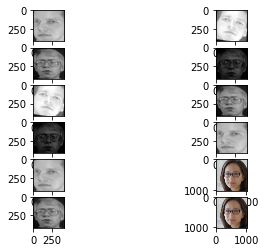

In [ ]:
# testing cosine similarity just after embedding without PCA #


s1_sample1 = random.randint(0,299)
s1_sample2 = random.randint(0,299)
s2_sample1 = random.randint(300,599)
s2_sample2 = random.randint(300,599)

sx_sample = random.randint(0,1999)


# (a,b,samedataset,stage,chaff)

# Results after face embedding #


print('******* Result summary after face embedding *********\n')
print('testing 1:')
cosine_similarity_comparison(s1_sample1,s1_sample2,1,0,0)
print('\n')
print('testing 2:\n')
cosine_similarity_comparison(s2_sample1,s2_sample2,1,0,0)
print('\n')
print('testing 3:\n')
cosine_similarity_comparison(s1_sample2,s2_sample1,1,0,0)
print('\n')
print('testing 4:\n')
cosine_similarity_comparison(s2_sample2,s1_sample1,1,0,0)
print('\n')
print('testing 5:\n')
cosine_similarity_comparison(s1_sample1,sx_sample,0,0,0)
print('\n')
print('testing 6:\n')
cosine_similarity_comparison(s2_sample1,sx_sample,0,0,0)




# Results after PCA #
print('\n\n')
print('******* Result summary after applying PCA *********\n')
print('testing 1:')
cosine_similarity_comparison(s1_sample1,s1_sample2,1,1,0)
print('\n')
print('testing 2:\n')
cosine_similarity_comparison(s2_sample1,s2_sample2,1,1,0)
print('\n')
print('testing 3:\n')
cosine_similarity_comparison(s1_sample2,s2_sample1,1,1,0)
print('\n')
print('testing 4:\n')
cosine_similarity_comparison(s2_sample2,s1_sample1,1,1,0)
print('\n')
print('testing 5:\n')
cosine_similarity_comparison(s1_sample1,sx_sample,0,1,0)
print('\n')
print('testing 6:\n')
cosine_similarity_comparison(s2_sample1,sx_sample,0,1,0)



print('\n\n')
path1 = os.path.join(datafolder + '/s1/' + 's1_' + str(s1_sample1) + '.jpg')
img1 = Image.open(path1)


path2 = os.path.join(datafolder + '/s1/' + 's1_' + str(s1_sample2) + '.jpg')
img2 = Image.open(path2)


path3 = os.path.join(datafolder + '/s2/' + 's2_' + str(s2_sample1) + '.jpg')
img3 = Image.open(path3)


path4 = os.path.join(datafolder + '/s2/' + 's2_' + str(s2_sample2) + '.jpg')
img4 = Image.open(path4)


path4 = os.path.join(datafolder + '/s2/' + 's2_' + str(s2_sample2) + '.jpg')
img4 = Image.open(path4)

path5 = os.path.join(os.getcwd() + '/2k_random_images/' + str(sx_sample) + '.jpg')
img5 = Image.open(path5)


f, axarr = plt.subplots(6,2)
axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)

axarr[1,0].imshow(img3)
axarr[1,1].imshow(img4)

axarr[2,0].imshow(img2)
axarr[2,1].imshow(img3)

axarr[3,0].imshow(img4)
axarr[3,1].imshow(img1)

axarr[4,0].imshow(img1)
axarr[4,1].imshow(img5)

axarr[5,0].imshow(img3)
axarr[5,1].imshow(img5)




In [ ]:
# PCA data generation for template class images #

X_template_pca_for_chaff = np.around(pca.fit_transform(X_data),4)[:400]

# PCA data generation for other class images in same dataset #

X_other_pca_for_chaff = np.around(pca.fit_transform(X_data),4)[400:]

# chaff points generation for random images #

X_random_pca_for_chaff = np.around(pca.fit_transform(X_random),4)


In [ ]:
# chaff points generation for template class images #

X_template_chaffs_A = vectorization(X_template_pca_for_chaff,'A')
X_template_chaffs_B = vectorization(X_template_pca_for_chaff,'B')
X_template_chaffs_C = vectorization(X_template_pca_for_chaff,'C')
X_template_chaffs_D = vectorization(X_template_pca_for_chaff,'D')
X_template_chaffs_E = vectorization(X_template_pca_for_chaff,'E')

X_template_chaffs_X = vectorization(X_template_pca_for_chaff,'A')

# chaff points generation for other class images in same dataset #

X_other_chaffs_A = vectorization(X_other_pca_for_chaff,'A')
X_other_chaffs_B = vectorization(X_other_pca_for_chaff,'B')
X_other_chaffs_C = vectorization(X_other_pca_for_chaff,'C')
X_other_chaffs_D = vectorization(X_other_pca_for_chaff,'D')
X_other_chaffs_E = vectorization(X_other_pca_for_chaff,'E')

X_other_chaffs_X = vectorization(X_other_pca_for_chaff,'X')

# chaff points generation for random images #

X_random_chaffs_A = vectorization(X_random_pca_for_chaff,'A')
X_random_chaffs_B = vectorization(X_random_pca_for_chaff,'B')
X_random_chaffs_C = vectorization(X_random_pca_for_chaff,'C')
X_random_chaffs_D = vectorization(X_random_pca_for_chaff,'D')
X_random_chaffs_E = vectorization(X_random_pca_for_chaff,'E')

X_random_chaffs_X = vectorization(X_random_pca_for_chaff,'X')


In [ ]:
np.shape(X_random_chaffs_X)

(2000, 5)

In [ ]:
### Distribution generation function for class 1 , class 2 and random images ###


template_class_dist_embed = []
other_class_dist_embed = []
random_class_dist_embed = []


template_class_dist_pca = []
other_class_dist_pca = []
random_class_dist_pca = []


template_class_dist_chaff_A = []
other_class_dist_chaff_A = []
random_class_dist_chaff_A = []

template_class_dist_chaff_B = []
other_class_dist_chaff_B = []
random_class_dist_chaff_B = []

template_class_dist_chaff_C = []
other_class_dist_chaff_C = []
random_class_dist_chaff_C = []

template_class_dist_chaff_D = []
other_class_dist_chaff_D = []
random_class_dist_chaff_D = []

template_class_dist_chaff_E = []
other_class_dist_chaff_E = []
random_class_dist_chaff_E = []


template_class_dist_chaff_X = []
other_class_dist_chaff_X = []
random_class_dist_chaff_X = []



# (a,b,samedataset,stage,chaff) #


for i in range(400):
    template_class_dist_embed.append(cosine_similarity_comparison(0,i,1,0,0))
    other_class_dist_embed.append(cosine_similarity_comparison(0,400+i,1,0,0))
    random_class_dist_embed.append(cosine_similarity_comparison(0,i,0,0,0))


    template_class_dist_pca.append(cosine_similarity_comparison(0,i,1,1,0))
    other_class_dist_pca.append(cosine_similarity_comparison(0,400+i,1,1,0))
    random_class_dist_pca.append(cosine_similarity_comparison(0,i,0,1,0))


    template_class_dist_chaff_A.append(cosine_similarity_comparison(0,i,1,2,'A'))
    other_class_dist_chaff_A.append(cosine_similarity_comparison(0,400+i,1,2,'A'))
    random_class_dist_chaff_A.append(cosine_similarity_comparison(0,i,0,2,'A'))

    template_class_dist_chaff_B.append(cosine_similarity_comparison(0,i,1,2,'B'))
    other_class_dist_chaff_B.append(cosine_similarity_comparison(0,400+i,1,2,'B'))
    random_class_dist_chaff_B.append(cosine_similarity_comparison(0,i,0,2,'B'))

    template_class_dist_chaff_C.append(cosine_similarity_comparison(0,i,1,2,'C'))
    other_class_dist_chaff_C.append(cosine_similarity_comparison(0,400+i,1,2,'C'))
    random_class_dist_chaff_C.append(cosine_similarity_comparison(0,i,0,2,'C'))

    template_class_dist_chaff_D.append(cosine_similarity_comparison(0,i,1,2,'D'))
    other_class_dist_chaff_D.append(cosine_similarity_comparison(0,400+i,1,2,'D'))
    random_class_dist_chaff_D.append(cosine_similarity_comparison(0,i,0,2,'D'))


    template_class_dist_chaff_E.append(cosine_similarity_comparison(0,i,1,2,'E'))
    other_class_dist_chaff_E.append(cosine_similarity_comparison(0,400+i,1,2,'E'))
    random_class_dist_chaff_E.append(cosine_similarity_comparison(0,i,0,2,'E'))



    template_class_dist_chaff_X.append(cosine_similarity_comparison(0,i,1,2,'X'))
    other_class_dist_chaff_X.append(cosine_similarity_comparison(0,400+i,1,2,'X'))
    random_class_dist_chaff_X.append(cosine_similarity_comparison(0,i,0,2,'X'))

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are 

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison ma

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image cl

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image class

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison ma

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison 

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image 

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine si

please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, 

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
Th

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The 

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
Th

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two i

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine 

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two i

please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, 

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine si

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comp

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, 

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, co

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image 

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison 

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine simil

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine 

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine simil

please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
Th

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, co

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
Th

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image cl

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine 

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image 

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine si

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine sim

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels


The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two i

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image 

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine si

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine sim

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
Th

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine 

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine si

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine sim

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
Th

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image 

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine sim

please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity compar

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity compar

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity compar

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine sim

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
Th

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine simil

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
Th

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The 

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image 

please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
Th

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
Th

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine s

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The 

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are same
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two i

please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
please check, 

The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine simil

The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine similarity comparison matches with original labels
The two image classes are different
The cosine similarity comparison matches with original labels
The two image classes are different
please check, cosine similarity comparison failed
The cosine simil

(array([17., 43., 42., 39., 43., 39., 39., 58., 50., 30.]),
 array([-0.935 , -0.7468, -0.5586, -0.3704, -0.1822,  0.006 ,  0.1942,
         0.3824,  0.5706,  0.7588,  0.947 ]),
 <BarContainer object of 10 artists>)

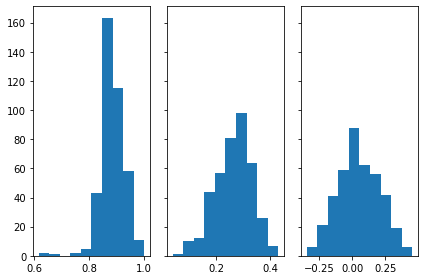

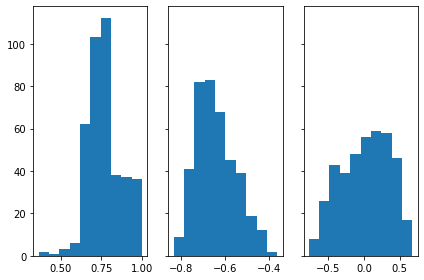

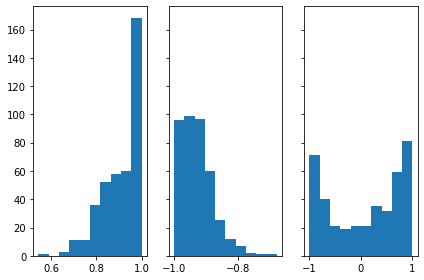

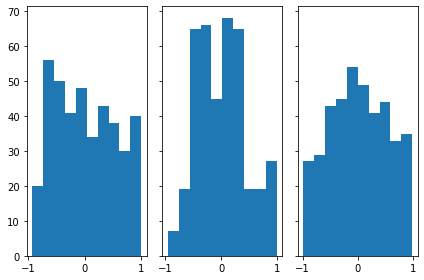

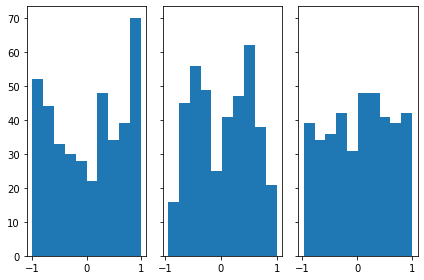

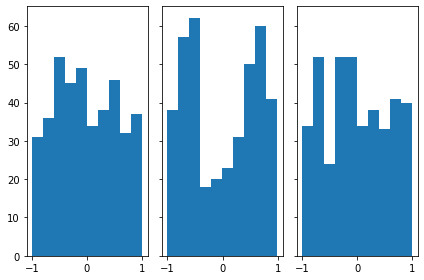

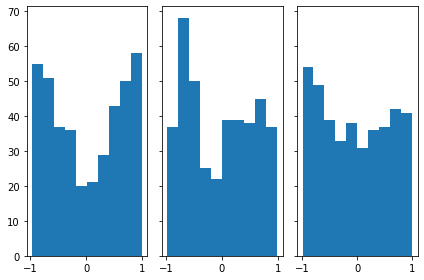

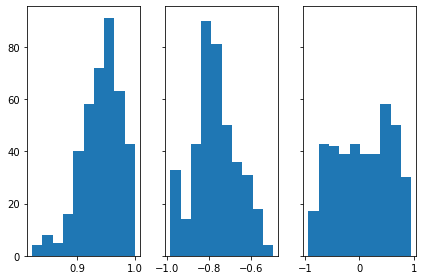

In [ ]:
### Histogram plotting ###

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors


fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.

axs[0].hist(template_class_dist_embed, bins=10)
axs[1].hist(other_class_dist_embed, bins=10)
axs[2].hist(random_class_dist_embed, bins=10)


fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(template_class_dist_pca, bins=10)
axs[1].hist(other_class_dist_pca, bins=10)
axs[2].hist(random_class_dist_pca, bins=10)


fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(template_class_dist_chaff_A, bins=10)
axs[1].hist(other_class_dist_chaff_A, bins=10)
axs[2].hist(random_class_dist_chaff_A, bins=10)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(template_class_dist_chaff_B, bins=10)
axs[1].hist(other_class_dist_chaff_B, bins=10)
axs[2].hist(random_class_dist_chaff_B, bins=10)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(template_class_dist_chaff_C, bins=10)
axs[1].hist(other_class_dist_chaff_C, bins=10)
axs[2].hist(random_class_dist_chaff_C, bins=10)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(template_class_dist_chaff_D, bins=10)
axs[1].hist(other_class_dist_chaff_D, bins=10)
axs[2].hist(random_class_dist_chaff_D, bins=10)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(template_class_dist_chaff_E, bins=10)
axs[1].hist(other_class_dist_chaff_E, bins=10)
axs[2].hist(random_class_dist_chaff_E, bins=10)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(template_class_dist_chaff_X, bins=10)
axs[1].hist(other_class_dist_chaff_X, bins=10)
axs[2].hist(random_class_dist_chaff_X, bins=10)

In [ ]:
## plotting ROC for various condition ##

def roc_creation(distro1,distro2):

    genuine_label = list(np.ones(400, dtype = int))
    imposter_label = list(np.zeros(400, dtype = int))
    y_test = np.concatenate([np.array(genuine_label), np.array(imposter_label)])

    # return y_test

    genuine_label = list(distro1)
    imposter_label = list(distro2)
    y_prob = np.concatenate([np.array(genuine_label), np.array(imposter_label)])



    fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(fpr, tpr)



    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()




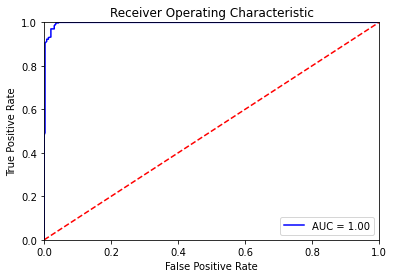

In [ ]:
roc_creation(template_class_dist_chaff_X,random_class_dist_chaff_X)

In [ ]:
# new experiment with hashing #
def newhash(mystring):

    encoded=mystring.encode()
    result = hashlib.sha256(encoded)

    print("Block Size : ", end ="")
    print(result.block_size)

    return(result.hexdigest())

In [ ]:
# generic hash function testing #

fixed_hash = 'a36b1f2c3f84522dd1005145646617d7054c0851e97c72a039c0bdfac9fa07f3'

current_hash = newhash(str([1,2,3]))


if(current_hash == fixed_hash):
    print('Hash function is working properly')
else:
    print("There is some issue with hash function")

Block Size : 64
Hash function is working properly


In [ ]:
# template image hash generation #

A0 = vectorization(np.around(pca.fit_transform(X_data),3),'A')[0]
B0 = vectorization(np.around(pca.fit_transform(X_data),3),'B')[0]
C0 = vectorization(np.around(pca.fit_transform(X_data),3),'C')[0]
D0 = vectorization(np.around(pca.fit_transform(X_data),3),'D')[0]
E0 = vectorization(np.around(pca.fit_transform(X_data),3),'E')[0]

m_prime = newhash(str([A0,B0,C0,D0,E0]))

Block Size : 64


In [ ]:
# advanced hash function testing #

if (m_prime == '72a5f090b1fff6970256c4689cfa47e6dbe2efcbe3f91ba194a48b1f97bbe359'):
    print("hash generation of chaff points is working fine")
else:
    print("please check hash generation of chaff points")

hash generation of chaff points is working fine


In [ ]:
m_prime

'72a5f090b1fff6970256c4689cfa47e6dbe2efcbe3f91ba194a48b1f97bbe359'